In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import sklearn
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/russian_retail.csv")

In [ ]:
print(data.head(3))

                name country_origin      domain price_category  founded  \
0            Tamaris       Германия       Обувь        Средний     1967   
1         100 Столов         Россия      Мебель        Средний     2008   
2  1000 и одна сумка         Россия  Аксессуары        Средний     2003   

                                    presence_regions  \
0  Москва; Санкт-Петербург; Барнаул; Бийск; Екате...   
1                                             Брянск   
2  Москва; Санкт-Петербург; Анапа; Армавир; Астра...   

                                         description  
0  Популярный бренд женской обуви и аксессуаров T...  
1  На протяжении 8 лет компания "100 Столов" зани...  
2  «1000 и одна сумка» - динамично развивающаяся ...  


In [ ]:
data

,name,country_origin,domain,price_category,founded,presence_regions,description
0,Tamaris,Германия,Обувь,Средний,1967,Москва; Санкт-Петербург; Барнаул; Бийск; Екате...,Популярный бренд женской обуви и аксессуаров T...
1,100 Столов,Россия,Мебель,Средний,2008,Брянск,"На протяжении 8 лет компания ""100 Столов"" зани..."
2,1000 и одна сумка,Россия,Аксессуары,Средний,2003,Москва; Санкт-Петербург; Анапа; Армавир; Астра...,«1000 и одна сумка» - динамично развивающаяся ...
3,1001 Платье,Россия,Одежда,Средний,2008,Москва; Санкт-Петербург,«1001 Платье» — российский производитель женск...
4,1001 тур,Россия,"Туризм, путешествия",Средний,2002,Москва; Санкт-Петербург; Архангельск; Балашиха...,Компания «1001 Тур» работает с 2002 года. Сейч...
...,...,...,...,...,...,...,...
2469,Яркий,Россия,Товары и услуги для детей,Средний,2011,Москва,"«Яркий» – сеть магазинов, в которых Вы можете ..."
2470,Яркий фотомаркет,Россия,"Сотовые телефоны, электроника, фото",Средний,1995,Москва; Санкт-Петербург; Ростов-на-Дону,Первый магазин по продаже фотоуслуг и фототехн...
2471,Ярмарка Мебели,Россия,Мебель,Средний,2008,Москва; Санкт-Петербург; Астрахань; Барнаул; Б...,ЯРМАРКА МЕБЕЛИ - федеральная сеть мебельных ги...
2472,Ярче!,Россия,Продукты питания,Средний,2012,Москва; Балашиха; Барнаул; Бийск; Видное; Воло...,"«Ярче!» - супермаркеты шаговой доступности, гд..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2474 non-null   object
 1   country_origin    2474 non-null   object
 2   domain            2474 non-null   object
 3   price_category    2474 non-null   object
 4   founded           2474 non-null   int64 
 5   presence_regions  2474 non-null   object
 6   description       2474 non-null   object
dtypes: int64(1), object(6)
memory usage: 135.4+ KB


In [ ]:
res = data["price_category"].value_counts()
print(res)

Средний        2169
Премиальный     196
Дисконт         102
Неизвестно        7
Name: price_category, dtype: int64


In [ ]:
print(data['price_category'].unique())

['Средний' 'Дисконт' 'Премиальный' 'Неизвестно']


In [ ]:
print(data[data['price_category'] == 'Неизвестно']['name'])

270            Eco Beauty
565            Mgrillcafe
584               Mondial
610             NeoДжоуль
636                 OPIUM
1544         КупиЧехол.ру
1732    Монетная компания
Name: name, dtype: object


In [ ]:
data = data[data['price_category'] != 'Неизвестно']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# экземпляр RandomOverSampler
oversampler = RandomOverSampler()

# Ресэмплинг с помощью RandomOverSampler
X_resampled, y_resampled = oversampler.fit_resample(data.drop('price_category', axis=1), data['price_category'])

In [ ]:
y_resampled.value_counts()

Средний        2169
Дисконт        2169
Премиальный    2169
Name: price_category, dtype: int64

In [ ]:
df = pd.concat([X_resampled, y_resampled], axis=1, join='inner')
df

,name,country_origin,domain,founded,presence_regions,description,price_category
0,Tamaris,Германия,Обувь,1967,Москва; Санкт-Петербург; Барнаул; Бийск; Екате...,Популярный бренд женской обуви и аксессуаров T...,Средний
1,100 Столов,Россия,Мебель,2008,Брянск,"На протяжении 8 лет компания ""100 Столов"" зани...",Средний
2,1000 и одна сумка,Россия,Аксессуары,2003,Москва; Санкт-Петербург; Анапа; Армавир; Астра...,«1000 и одна сумка» - динамично развивающаяся ...,Средний
3,1001 Платье,Россия,Одежда,2008,Москва; Санкт-Петербург,«1001 Платье» — российский производитель женск...,Средний
4,1001 тур,Россия,"Туризм, путешествия",2002,Москва; Санкт-Петербург; Архангельск; Балашиха...,Компания «1001 Тур» работает с 2002 года. Сейч...,Средний
...,...,...,...,...,...,...,...
6502,TOY.RU,Россия,Товары и услуги для детей,2014,Москва; Санкт-Петербург; Альметьевск; Архангел...,TOY.RU – это: • Розничное подразделение одного...,Премиальный
6503,THOMAS MUNZ,Германия,Обувь,1994,Москва; Санкт-Петербург; Архангельск; Барнаул;...,THOMAS MÜNZ — немецкий инновационный бренд. Ко...,Премиальный
6504,Carlo Pazolini,Италия,Обувь,1990,Москва; Санкт-Петербург; Анапа; Армавир; Архан...,CARLO PAZOLINI — одна из лидирующих компаний в...,Премиальный
6505,SK Royal Hotel,Россия,Услуги населению,2004,Москва; Калуга; Тула; Ярославль,Отели сети SK Royal находятся под управлением ...,Премиальный


In [ ]:
print(df['price_category'].unique())

['Средний' 'Дисконт' 'Премиальный']


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
print(stop_words)

{'там', 'ну', 'него', 'моя', 'опять', 'они', 'в', 'нас', 'о', 'уж', 'ей', 'после', 'через', 'если', 'на', 'ее', 'эти', 'этой', 'надо', 'он', 'вот', 'между', 'по', 'совсем', 'тот', 'какая', 'три', 'есть', 'ним', 'да', 'во', 'как', 'при', 'меня', 'этом', 'всю', 'с', 'до', 'раз', 'сам', 'ж', 'чтобы', 'вас', 'хорошо', 'того', 'более', 'где', 'об', 'перед', 'даже', 'сейчас', 'этот', 'им', 'потом', 'со', 'впрочем', 'тебя', 'всегда', 'нибудь', 'что', 'то', 'теперь', 'ли', 'можно', 'этого', 'тут', 'никогда', 'над', 'и', 'здесь', 'у', 'разве', 'всего', 'еще', 'к', 'для', 'два', 'такой', 'иногда', 'нельзя', 'чего', 'тогда', 'была', 'были', 'лучше', 'под', 'зачем', 'было', 'бы', 'больше', 'тоже', 'но', 'мне', 'без', 'про', 'мы', 'чем', 'я', 'тем', 'ты', 'мой', 'из', 'свою', 'уже', 'а', 'чтоб', 'вы', 'конечно', 'ему', 'будто', 'нее', 'ни', 'себе', 'или', 'так', 'все', 'же', 'себя', 'них', 'ведь', 'том', 'кто', 'она', 'хоть', 'будет', 'потому', 'за', 'вам', 'почти', 'ней', 'от', 'может', 'наконец',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def description_to_words(text):
    text = text.replace('ё','е')
    text = text.replace('Ё','Е')
    letters_only = re.sub("[^а-яА-Я]", " ", text)
    words = letters_only.lower().split()
    no_stop_words = [w for w in words if not w in stop_words]
    return(" ".join(no_stop_words))

In [ ]:
def regions_to_words(text):
    text = text.replace('ё','е')
    text = text.replace('Ё','Е')
    words = text.split(';')
    no_stop_words = [w for w in words if not w in stop_words]
    return(" ".join(no_stop_words))

In [ ]:
data_filtered = df.copy()
data_filtered['description'] = data_filtered['description'].apply(lambda s: description_to_words(s))
data_filtered['presence_regions'] = data_filtered['presence_regions'].apply(lambda s: regions_to_words(s))
print(data_filtered.head(3))

                name country_origin      domain  founded  \
0            Tamaris       Германия       Обувь     1967   
1         100 Столов         Россия      Мебель     2008   
2  1000 и одна сумка         Россия  Аксессуары     2003   

                                    presence_regions  \
0  Москва  Санкт-Петербург  Барнаул  Бийск  Екате...   
1                                             Брянск   
2  Москва  Санкт-Петербург  Анапа  Армавир  Астра...   

                                         description price_category  
0  популярный бренд женской обуви аксессуаров осн...        Средний  
1  протяжении лет компания столов занимаемся прод...        Средний  
2  одна сумка динамично развивающаяся сеть магази...        Средний  


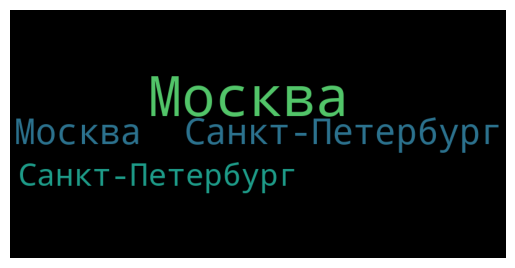

In [ ]:
regions = data_filtered['presence_regions'].value_counts()
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(regions)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

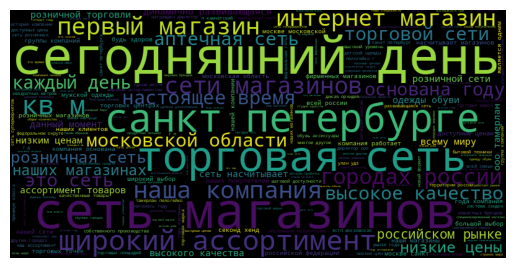

In [ ]:
description = data_filtered['description'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400).generate(description)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data_filtered, data_filtered['country_origin'], text_auto='.2s', title = f"Distribution of 'country_origin'")
fig.show()

Text(0.5, 0, 'country_origin')

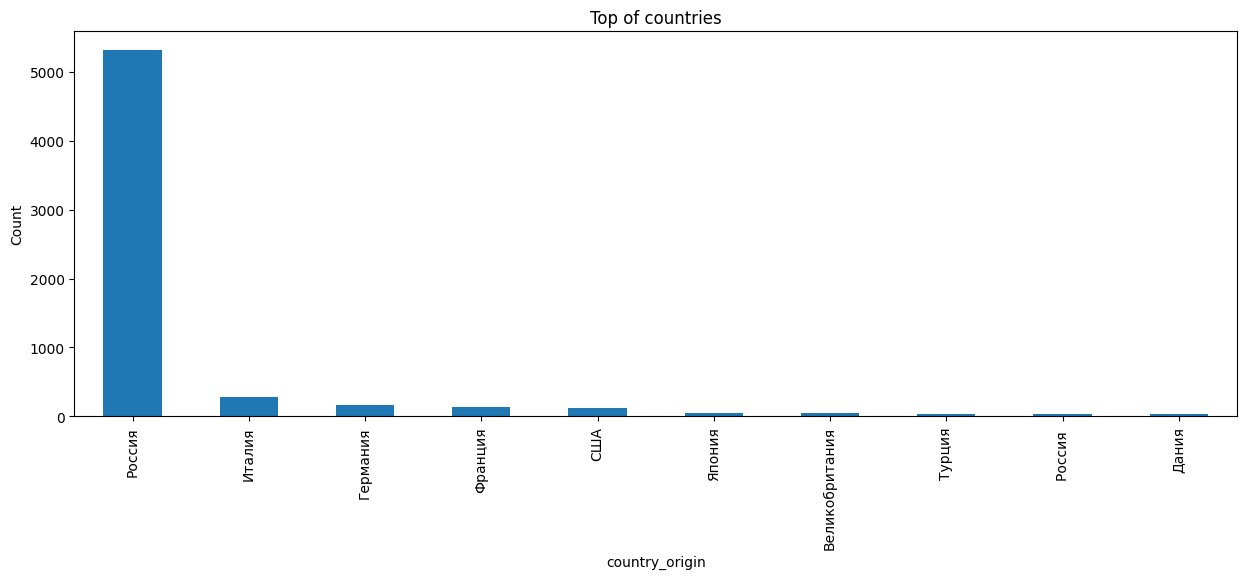

In [ ]:
data_filtered['country_origin'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Top of countries")
plt.ylabel('Count')
plt.xlabel('country_origin')

Text(0.5, 0, 'domain')

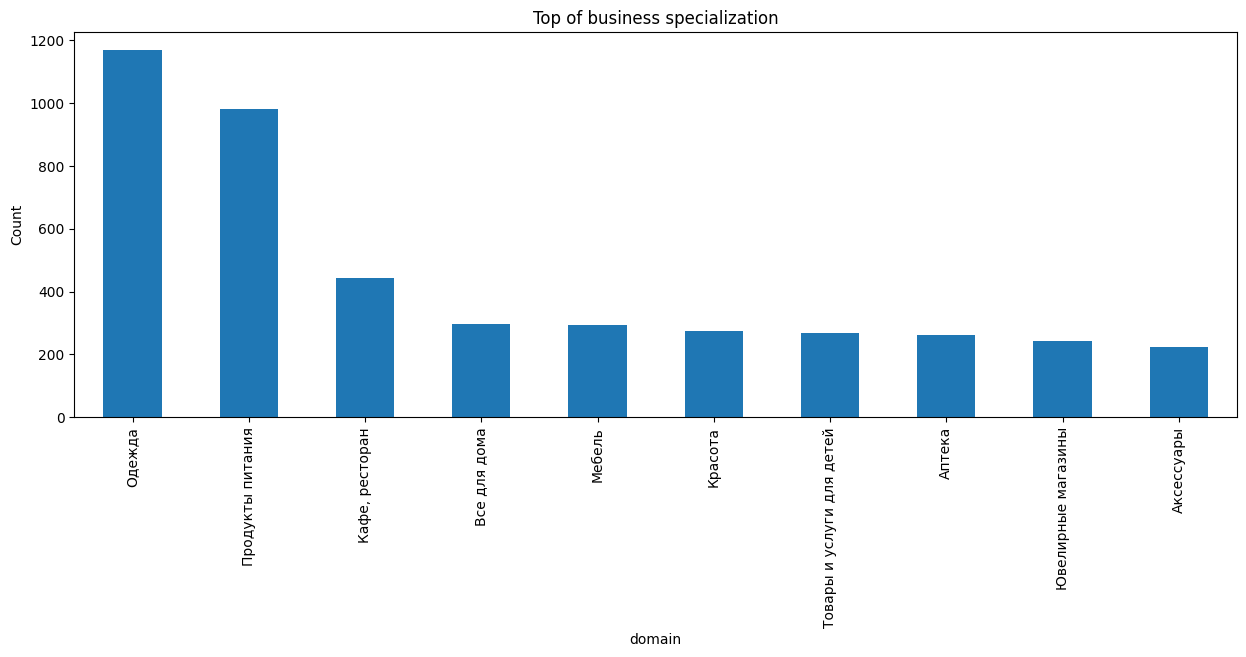

In [ ]:
data_filtered['domain'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Top of business specialization")
plt.ylabel('Count')
plt.xlabel('domain')